# Placement prediction using different ML Algorithms

![](https://images.unsplash.com/photo-1523050854058-8df90110c9f1?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1050&q=80)

The following topics are covered in this tutorial:

- Downloading a real-world dataset
- Preparing a dataset for training
- Training and interpreting using different Algos
- Overfitting, hyperparameter tuning & regularization
- Making predictions on single inputs



## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll learn how to use different algorithms to solve a real-world problem from [Kaggle](https://kaggle.com/datasets):

This data set consists of Placement data of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

> **QUESTION**: The [Campus Recruitment dataset](https://www.kaggle.com/benroshan/factors-affecting-campus-placement) contains about 215 student's bio from XYZ University to explore different parameters for placement. Here's a small sample from the dataset:
> 
> ![](https://i.imgur.com/Kk7PAi3.png)
>
> As a data scientist at the XYZ college, you are tasked with creating a fully-automated system that can use today's placement data for a given college to predict whether it will placed or not. 
>
>
> ![](https://images.unsplash.com/photo-1496469888073-80de7e952517?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1189&q=80)


Let's install and import some required libraries before we begin.

In [1]:
!pip install pandas numpy matplotlib seaborn --quiet

In [2]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

In [264]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Data

The dataset is available at https://www.kaggle.com/benroshan/factors-affecting-campus-placement .


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. 

In [6]:
od.download('https://www.kaggle.com/benroshan/factors-affecting-campus-placement')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harryhatala
Your Kaggle Key: ········


100%|██████████| 4.51k/4.51k [00:00<00:00, 5.18MB/s]

The dataset is downloaded and extracted to the folder `weather-dataset-rattle-package`.

In [116]:
os.listdir('factors-affecting-campus-placement')

['Placement_Data_Full_Class.csv']

The file `Placement_Data_Full_Class.csv` contains the data. Let's load it into a Pandas dataframe.

In [117]:
raw_df = pd.read_csv('factors-affecting-campus-placement/Placement_Data_Full_Class.csv')

In [118]:
raw_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


Each column shows the bio for a given student education history at a given location. The second last column "status" contains the value to be predicted.

Let's check the column types of the dataset.

In [119]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [120]:
raw_df.drop('sl_no',axis=1, inplace=True)

Let's save our work before continuing.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

### Input and Target Columns

Let's identify the input and target columns.

In [122]:
# raw_df.corr()
X = raw_df.drop('status', axis=1)
y = raw_df['status']

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### Training, Validation and Test Sets

In [123]:
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [124]:
print('train_df.shape :', X_train.shape)
print('test_df.shape :', X_test.shape)

train_df.shape : (144, 13)
test_df.shape : (71, 13)


In [125]:
train_inputs = X_train.copy()
train_targets = y_train.copy()

In [126]:
test_inputs = X_test.copy()
test_targets = y_test.copy()

Let's also identify the numeric and categorical columns.

In [127]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [128]:
print(numeric_cols)

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [129]:
print(categorical_cols)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']


> **EXERCISE**: Study how various columns are correlated with the target and select just a subset of the columns, instead of all of the. Observe how it affects the results.

## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [130]:
from sklearn.impute import SimpleImputer

In [131]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [132]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [133]:
test_inputs[numeric_cols].isna().sum()

ssc_p       0
hsc_p       0
degree_p    0
etest_p     0
mba_p       0
salary      0
dtype: int64

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [134]:
from sklearn.preprocessing import MinMaxScaler

In [135]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [136]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [137]:
train_inputs.describe().loc[['min', 'max']]

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
min,0.0,0.0,0.004878,0.0000,0.000000,0.0
max,1.0,1.0,1.000000,0.9875,0.938906,1.0


> **EXERCISE**: Try a different [scaling strategy](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) and observe how it affects the results.

## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [138]:
from sklearn.preprocessing import OneHotEncoder

In [139]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [140]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [141]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [142]:
test_inputs

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
108,M,0.414554,Central,0.741351,Central,Commerce,0.463415,Comm&Mgmt,No,0.708333,Mkt&Fin,0.266117,0.135135,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
207,M,0.874871,Central,0.675453,Others,Commerce,0.268293,Comm&Mgmt,Yes,0.803333,Mkt&Fin,0.762369,0.135135,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
106,M,0.416203,Others,0.214168,Others,Science,0.097561,Sci&Tech,No,0.437500,Mkt&Fin,0.542729,0.119805,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
107,M,0.847454,Others,0.873147,Others,Commerce,0.804878,Comm&Mgmt,No,0.625000,Mkt&HR,0.836207,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
51,M,0.278499,Central,0.397364,Central,Commerce,0.151220,Comm&Mgmt,No,0.354167,Mkt&HR,0.428786,0.119805,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
33,F,0.950526,Others,0.461285,Others,Science,0.756098,Comm&Mgmt,Yes,0.791667,Mkt&Fin,0.808471,0.081081,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
59,M,0.241394,Central,0.470840,Others,Science,0.539268,Sci&Tech,No,0.158333,Mkt&Fin,0.204273,0.087838,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
152,F,0.711400,Others,0.387150,Central,Science,0.829268,Sci&Tech,No,1.000000,Mkt&Fin,0.526237,0.054054,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,M,0.925788,Central,0.602965,Central,Commerce,0.568293,Comm&Mgmt,No,0.975000,Mkt&Fin,0.160795,0.304054,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
31,F,0.538240,Central,0.263591,Central,Science,0.365854,Sci&Tech,No,0.291667,Mkt&HR,0.266492,0.119805,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


As a final step, let's drop the textual categorical columns, so that we're left with just numeric data.

In [143]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [144]:
X_test

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
108,0.414554,0.741351,0.463415,0.708333,0.266117,0.135135,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
207,0.874871,0.675453,0.268293,0.803333,0.762369,0.135135,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
106,0.416203,0.214168,0.097561,0.437500,0.542729,0.119805,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
107,0.847454,0.873147,0.804878,0.625000,0.836207,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
51,0.278499,0.397364,0.151220,0.354167,0.428786,0.119805,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
33,0.950526,0.461285,0.756098,0.791667,0.808471,0.081081,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
59,0.241394,0.470840,0.539268,0.158333,0.204273,0.087838,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
152,0.711400,0.387150,0.829268,1.000000,0.526237,0.054054,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.925788,0.602965,0.568293,0.975000,0.160795,0.304054,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
31,0.538240,0.263591,0.365854,0.291667,0.266492,0.119805,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


Let's save our work before continuing.

In [67]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "googleboy/placement-prediction" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/googleboy/placement-prediction


'https://jovian.ai/googleboy/placement-prediction'

### Machine Learning Workflow

Whether we're solving a regression problem using linear regression or a classification problem using logistic regression, the workflow for training a model is exactly the same:

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


Classification and regression are both supervised machine learning problems, because they use labeled data. Machine learning applied to unlabeled data is known as unsupervised learning ([image source](https://au.mathworks.com/help/stats/machine-learning-in-matlab.html)). 

<img src="https://i.imgur.com/1EMQmAw.png" width="480">


In this tutorial, we'll train a _logistic regression_ model using the Rain in Australia dataset to predict whether or not it will rain at a location tomorrow, using today's data. This is a _binary classification_ problem.

Let's install the `scikit-learn` library which we'll use to train our model.

## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
model = LogisticRegression(solver='liblinear')

In [147]:
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [148]:
print(model.coef_.tolist())

[[3.2982721960762658, 1.7269281067360724, 1.3392745129752417, 0.12977988735120374, -0.7509923529455088, -0.014849279175942854, -0.45284636696308256, -0.03411560303895319, -0.2532467506679095, -0.23371521933412157, -0.25019786053149845, -0.2367641094705311, -0.3445419271532478, -0.07106925869590809, -0.0713507841528747, 0.11428254805344165, -0.2899612719805252, -0.31128324607494817, -0.7099801695095963, 0.22301819950756602, -0.056129773099135666, -0.4308321969028913]]


In [149]:
print(model.intercept_)

[-0.48696197]


Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.

## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test 

In [150]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 84.72%


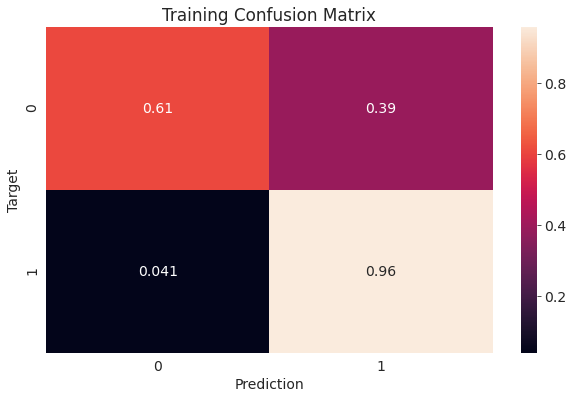

In [151]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 92.96%


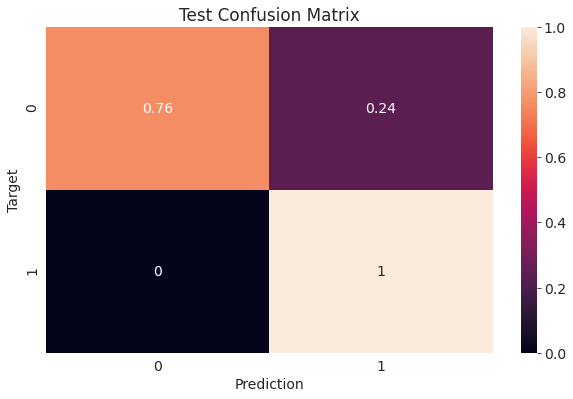

In [152]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

The accuracy of the model on the training and testing set above 84%, which suggests that our model generalizes well to data it hasn't seen before. 

But how good is 84.7% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "Not Placed". Both of these models completely ignore the inputs given to them.

In [153]:
def random_guess(inputs):
    return np.random.choice(["Not Placed", "Placed"], len(inputs))

In [154]:
def all_no(inputs):
    return np.full(len(inputs), "Not Placed")

In [155]:
accuracy_score(test_targets, random_guess(X_test))

0.5352112676056338

In [156]:
accuracy_score(test_targets, all_no(X_test))

0.29577464788732394

Our random model achieves an accuracy of 50% and our "always Not Placed" model achieves an accuracy of 29%. 

Thankfully, our model is far better than a "dumb" or "random" model! This is not always the case, so it's a good practice to benchmark any model you train against such baseline models.

Let's save our work before continuing.

In [ ]:
jovian.commit()

## Training and Visualizing Decision Trees

A decision tree in general parlance represents a hierarchical series of binary decisions:

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.

### Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [214]:
from sklearn.tree import DecisionTreeClassifier

In [215]:
model = DecisionTreeClassifier(random_state=3)

In [216]:
%%time
model.fit(X_train, train_targets)

CPU times: user 3.37 ms, sys: 215 µs, total: 3.59 ms
Wall time: 4.47 ms


DecisionTreeClassifier(random_state=3)

An optimal decision tree has now been created using the training data.

### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [217]:
train_preds = model.predict(X_train)
train_preds

array(['Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
       'Not Placed', 'Not Placed', 'Not Placed', 'Not Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed',
       'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
       'Not Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Not Placed', 'Not Placed', 'Placed', 'Not Placed',
       'Placed', 'Not Placed', 'Placed', 'Placed', 'Not Placed',
       'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Not Placed', 'Not Placed', 'Placed', 'Placed',
       'Not Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Not Placed', 'Not Placed', 'Placed',
       'Placed', 'Placed', 'No

In [201]:
test_preds = model.predict(X_test)
test_preds

array(['Placed', 'Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
       'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Not Placed', 'Not Placed', 'Placed', 'Not Placed',
       'Placed', 'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Placed',
       'Not Placed', 'Placed', 'Not Placed', 'Placed', 'Not Placed',
       'Placed', 'Placed', 'Placed', 'Placed', 'Placed', 'Placed',
       'Placed', 'Not Placed', 'Placed', 'Placed', 'Placed', 'Not Placed',
       'Placed', 'Placed'], dtype=object)

In [218]:
pd.value_counts(train_preds)

Placed        98
Not Placed    46
dtype: int64

The decision tree also returns probabilities for each prediction.

In [219]:
train_probs = model.predict_proba(X_train)

In [220]:
train_probs

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

Seems like the decision tree is quite confident about its predictions.

Let's check the accuracy of its predictions.

In [221]:
accuracy_score(train_targets, train_preds)

1.0

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too. 

We can make predictions and compute accuracy in one step using `model.score`

In [222]:
# Same as accuracy score
model.score(X_test, test_targets)

0.9859154929577465

Although the training accuracy is 100%, the accuracy on the validation set is just about 93%, which is only marginally better then always predicting "No". 

In [223]:
train_targets.value_counts() / len(train_targets)

Placed        0.680556
Not Placed    0.319444
Name: status, dtype: float64

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

### Visualization

We can visualize the decision tree _learned_ from the training data.

In [224]:
from sklearn.tree import plot_tree, export_text

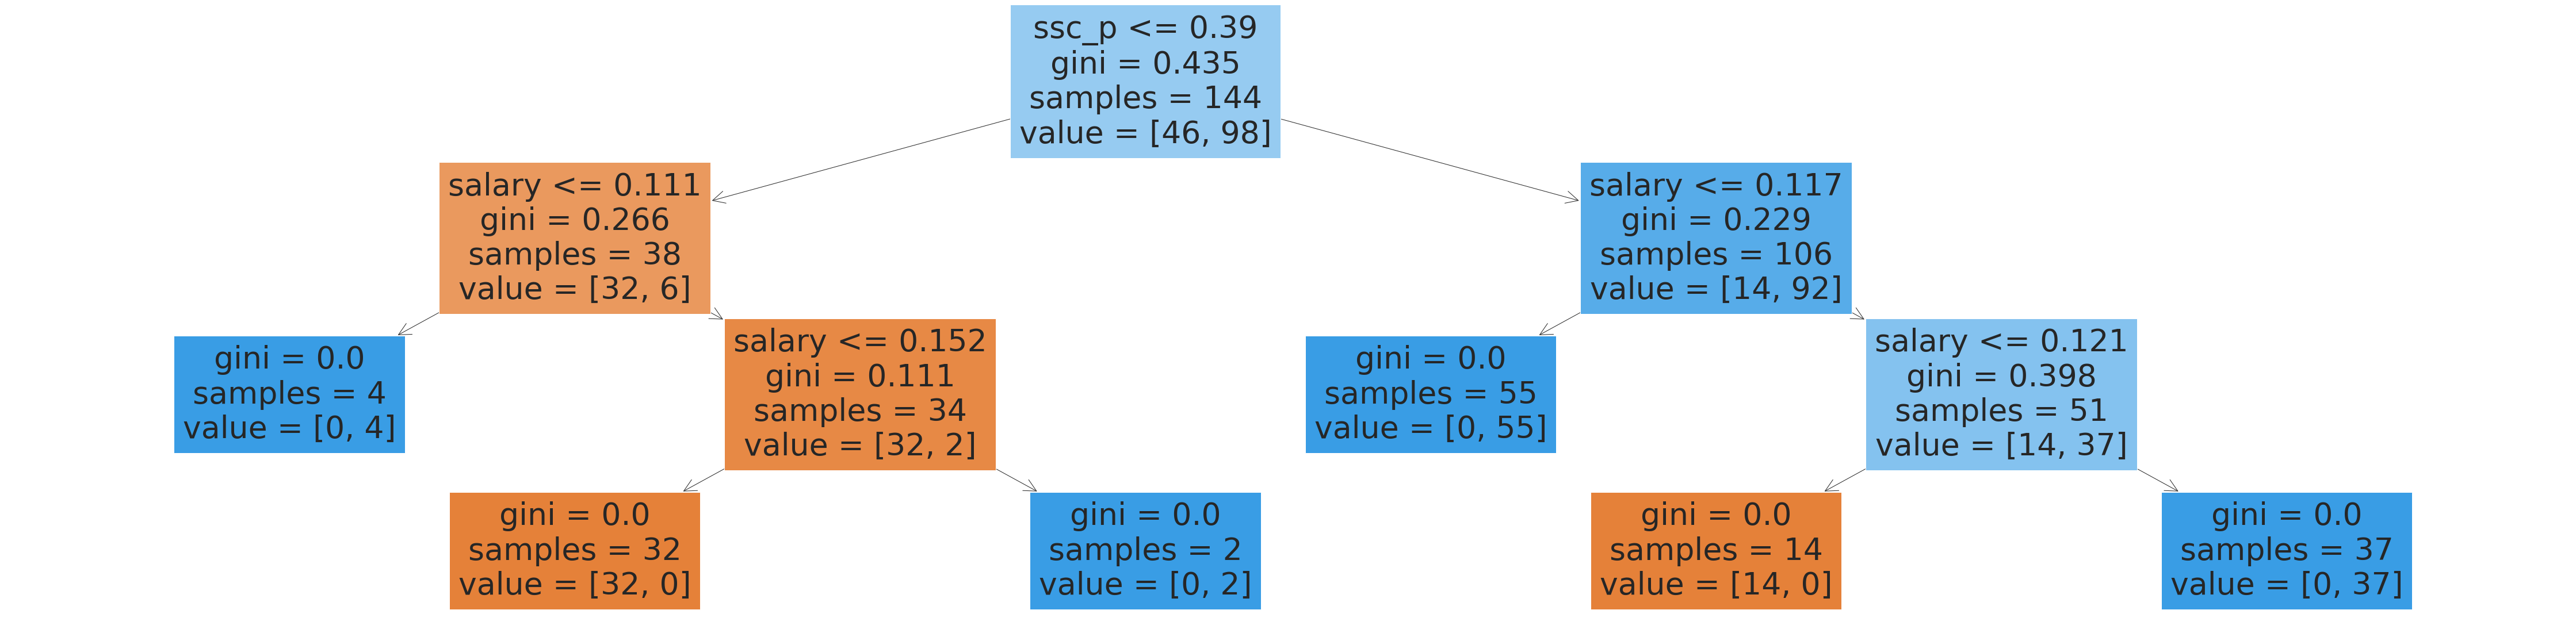

In [225]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=3, filled=True);

**How a Decision Tree is Created**

Note the `gini` value in each box. This is the loss function used by the decision tree to decide which column should be used for splitting the data, and at what point the column should be split. A lower Gini index indicates a better split. A perfect split (only one class on each side) has a Gini index of 0. 

For a mathematical discussion of the Gini Index, watch this video: https://www.youtube.com/watch?v=-W0DnxQK1Eo . It has the following formula:

<img src="https://i.imgur.com/CSC0gAo.png" width="240">

Conceptually speaking, while training the models evaluates all possible splits across all possible columns and picks the best one. Then, it recursively performs an optimal split for the two portions. In practice, however, it's very inefficient to check all possible splits, so the model uses a heuristic (predefined strategy) combined with some randomization.

The iterative approach of the machine learning workflow in the case of a decision tree involves growing the tree layer-by-layer:

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


Let's check the depth of the tree that was created.

In [226]:
model.tree_.max_depth

3

We can also display the tree as text, which can be easier to follow for deeper trees.

In [227]:
tree_text = export_text(model, max_depth=3, feature_names=list(X_train.columns))
print(tree_text)

|--- ssc_p <= 0.39
|   |--- salary <= 0.11
|   |   |--- class: Placed
|   |--- salary >  0.11
|   |   |--- salary <= 0.15
|   |   |   |--- class: Not Placed
|   |   |--- salary >  0.15
|   |   |   |--- class: Placed
|--- ssc_p >  0.39
|   |--- salary <= 0.12
|   |   |--- class: Placed
|   |--- salary >  0.12
|   |   |--- salary <= 0.12
|   |   |   |--- class: Not Placed
|   |   |--- salary >  0.12
|   |   |   |--- class: Placed



### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [228]:
model.feature_importances_

array([0.45046256, 0.        , 0.        , 0.        , 0.        ,
       0.54953744, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

Let's turn this into a dataframe and visualize the most important features.

In [229]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [230]:
importance_df.head(10)

,feature,importance
5,salary,0.549537
0,ssc_p,0.450463
12,hsc_s_Arts,0.000000
20,specialisation_Mkt&Fin,0.000000
19,workex_Yes,0.000000
18,workex_No,0.000000
17,degree_t_Sci&Tech,0.000000
16,degree_t_Others,0.000000
15,degree_t_Comm&Mgmt,0.000000
14,hsc_s_Science,0.000000


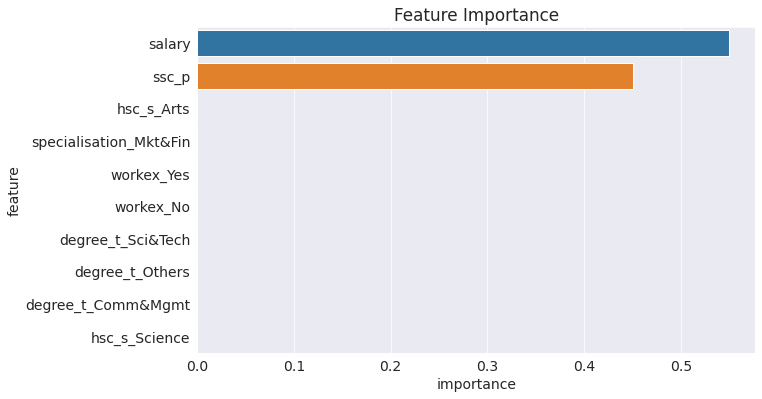

In [231]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Let's save our work before continuing.

In [58]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aakashns/sklearn-decision-trees-random-forests


'https://jovian.ai/aakashns/sklearn-decision-trees-random-forests'

## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as _regularlization_.


The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

In [59]:
?DecisionTreeClassifier

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

### `max_depth`

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [60]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [61]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

We can compute the accuracy of the model on the training and validation sets using `model.score`

In [62]:
model.score(X_train, train_targets)

0.8291308037337859

In [63]:
model.score(X_val, val_targets)

0.8334397307178921

Great, while the training accuracy of the model has gone down, the validation accuracy of the model has increased significantly.

In [64]:
model.classes_

array(['No', 'Yes'], dtype=object)

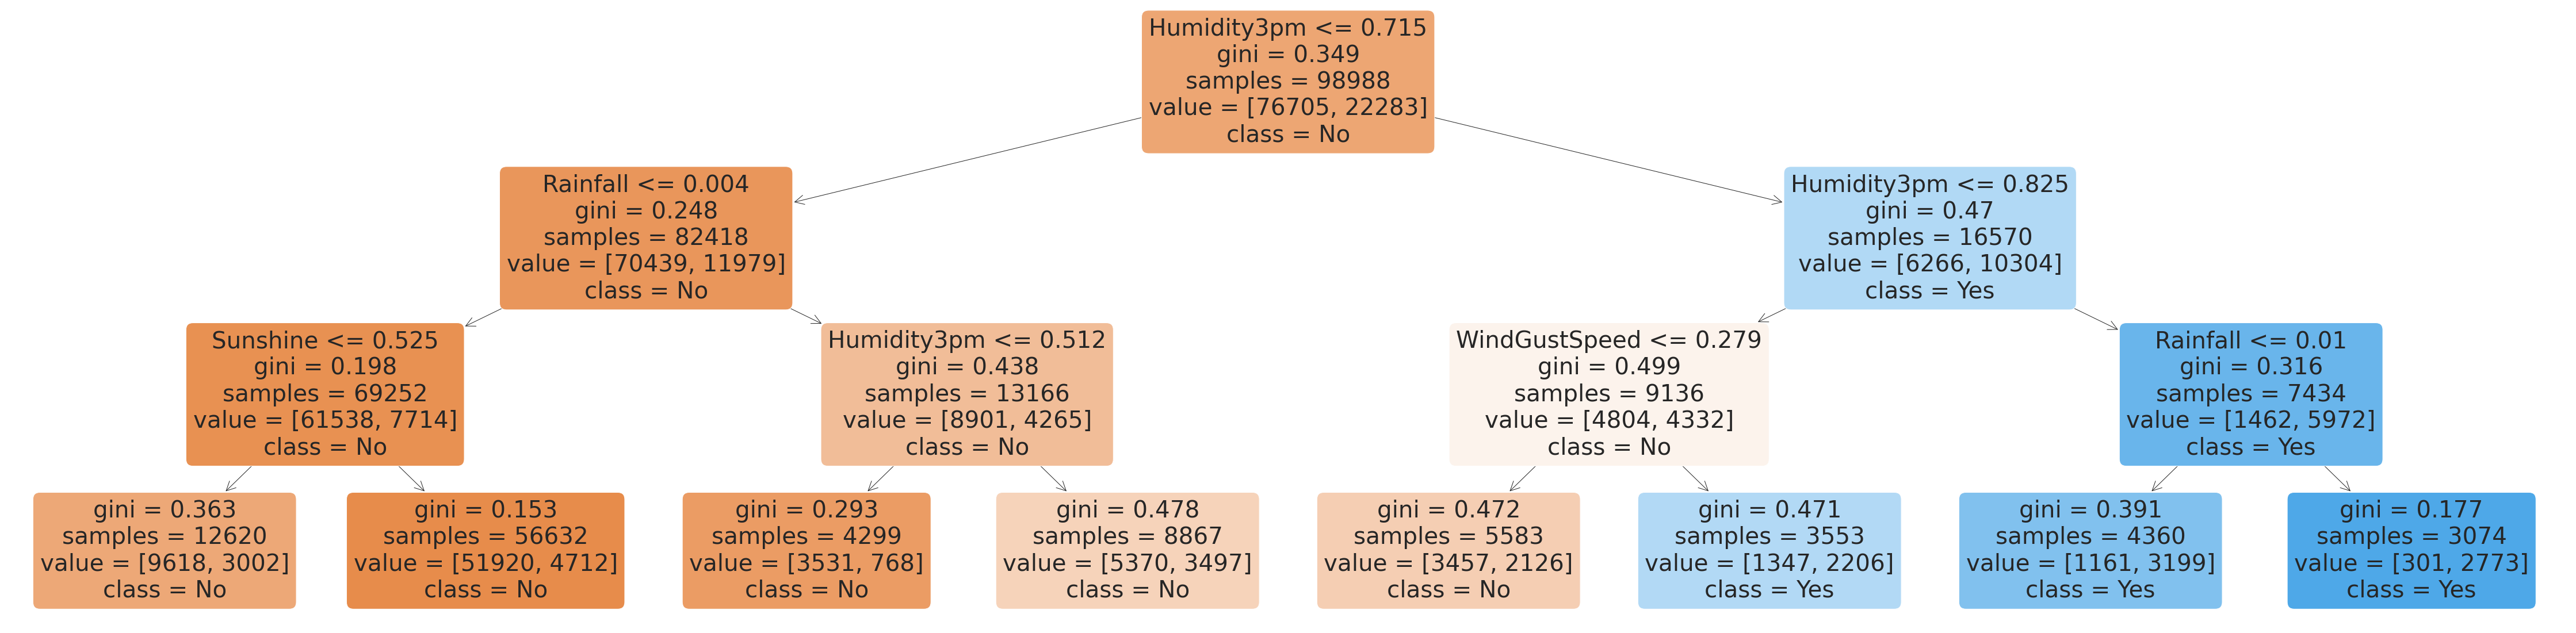

In [65]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

> **EXERCISE**: Study the decision tree diagram carefully and understand what each of the terms `gini`, `samples`, `value` and `class` mean.

In [67]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



Let's experiment with different depths using a helper function.

In [66]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [68]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 40.4 s, sys: 59.6 ms, total: 40.5 s
Wall time: 40.4 s


In [69]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.158029
8,9,0.140906,0.156578
9,10,0.132945,0.157333


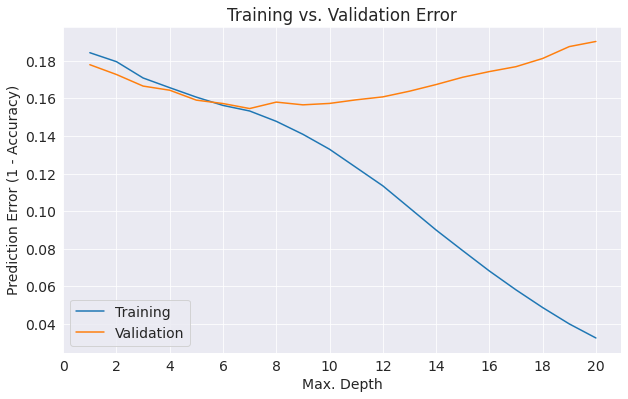

In [70]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

This is a common pattern you'll see with all machine learning algorithms:

<img src="https://i.imgur.com/EJCrSZw.png" width="480">





You'll often need to tune hyperparameters carefully to find the optimal fit. In the above case, it appears that a maximum depth of 7 results in the lowest validation error.

In [71]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.8453949277465034

### `max_leaf_nodes`

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths. 

In [72]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [73]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [74]:
model.score(X_train, train_targets)

0.8480421869317493

In [75]:
model.score(X_val, val_targets)

0.8442342290058615

In [76]:
model.tree_.max_depth

12

Notice that the model was able to achieve a greater depth of 12 for certain paths while keeping other paths shorter.

In [77]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- Sunshine >  0.05
|   |   |   |   |   |   |   |--- Pressure3pm <= 0.43
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- Pressure3pm >  0.43
|   |   |   |   |   |   |   |   |--- Humidity3pm <= 0.57
|   |   |   |   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |   |--- WindDir9am_NNE >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindD

Let's save our work before continuing.

In [78]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aakashns/sklearn-decision-trees-random-forests


'https://jovian.ai/aakashns/sklearn-decision-trees-random-forests'

## Training a Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model. 

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd":

<img src="https://i.imgur.com/4Dg0XK4.png" width="480">

A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

In [232]:
from sklearn.ensemble import RandomForestClassifier

In [233]:
model = RandomForestClassifier(n_jobs=-1, random_state=3)

`n_jobs` allows the random forest to use mutiple parallel workers to train decision trees, and `random_state=42` ensures that the we get the same results for each execution.

In [234]:
%%time
model.fit(X_train, train_targets)

CPU times: user 199 ms, sys: 46 ms, total: 245 ms
Wall time: 205 ms


RandomForestClassifier(n_jobs=-1, random_state=3)

In [235]:
model.score(X_train, train_targets)

1.0

In [236]:
model.score(X_test, test_targets)

0.9859154929577465

In [242]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [243]:
accuracy_score(train_targets, train_preds)

1.0

In [244]:
accuracy_score(test_targets, test_preds)

0.9859154929577465

Once again, the training accuracy is almost 100%, but this time the validation accuracy is much better. In fact, it is better than the best single decision tree we had trained so far. Do you see the power of random forests?

This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging. Here's what it looks like visually:

<img src="https://i.imgur.com/qJo8D8b.png" width="640">


We can also look at the probabilities for the predictions. The probability of a class is simply the fraction of trees which that predicted the given class.

In [245]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.02, 0.98],
       [0.06, 0.94],
       [0.1 , 0.9 ],
       [0.06, 0.94],
       [0.02, 0.98],
       [0.96, 0.04],
       [0.9 , 0.1 ],
       [0.89, 0.11],
       [0.98, 0.02],
       [0.84, 0.16],
       [0.02, 0.98],
       [0.13, 0.87],
       [0.02, 0.98],
       [0.16, 0.84],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.08, 0.92],
       [0.02, 0.98],
       [0.89, 0.11],
       [0.  , 1.  ],
       [0.88, 0.12],
       [0.06, 0.94],
       [0.98, 0.02],
       [0.05, 0.95],
       [0.12, 0.88],
       [0.23, 0.77],
       [0.21, 0.79],
       [0.07, 0.93],
       [0.09, 0.91],
       [0.04, 0.96],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.06, 0.94],
       [0.82, 0.18],
       [0.82, 0.18],
       [0.94, 0.06],
       [0.01, 0.99],
       [0.76, 0.24],
       [0.05, 0.95],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.97, 0.03],
       [0.04, 0.96],
       [0.86, 0.14],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.03, 0.97],
       [0.09,

We can can access individual decision trees using `model.estimators_`

In [246]:
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=218175338)

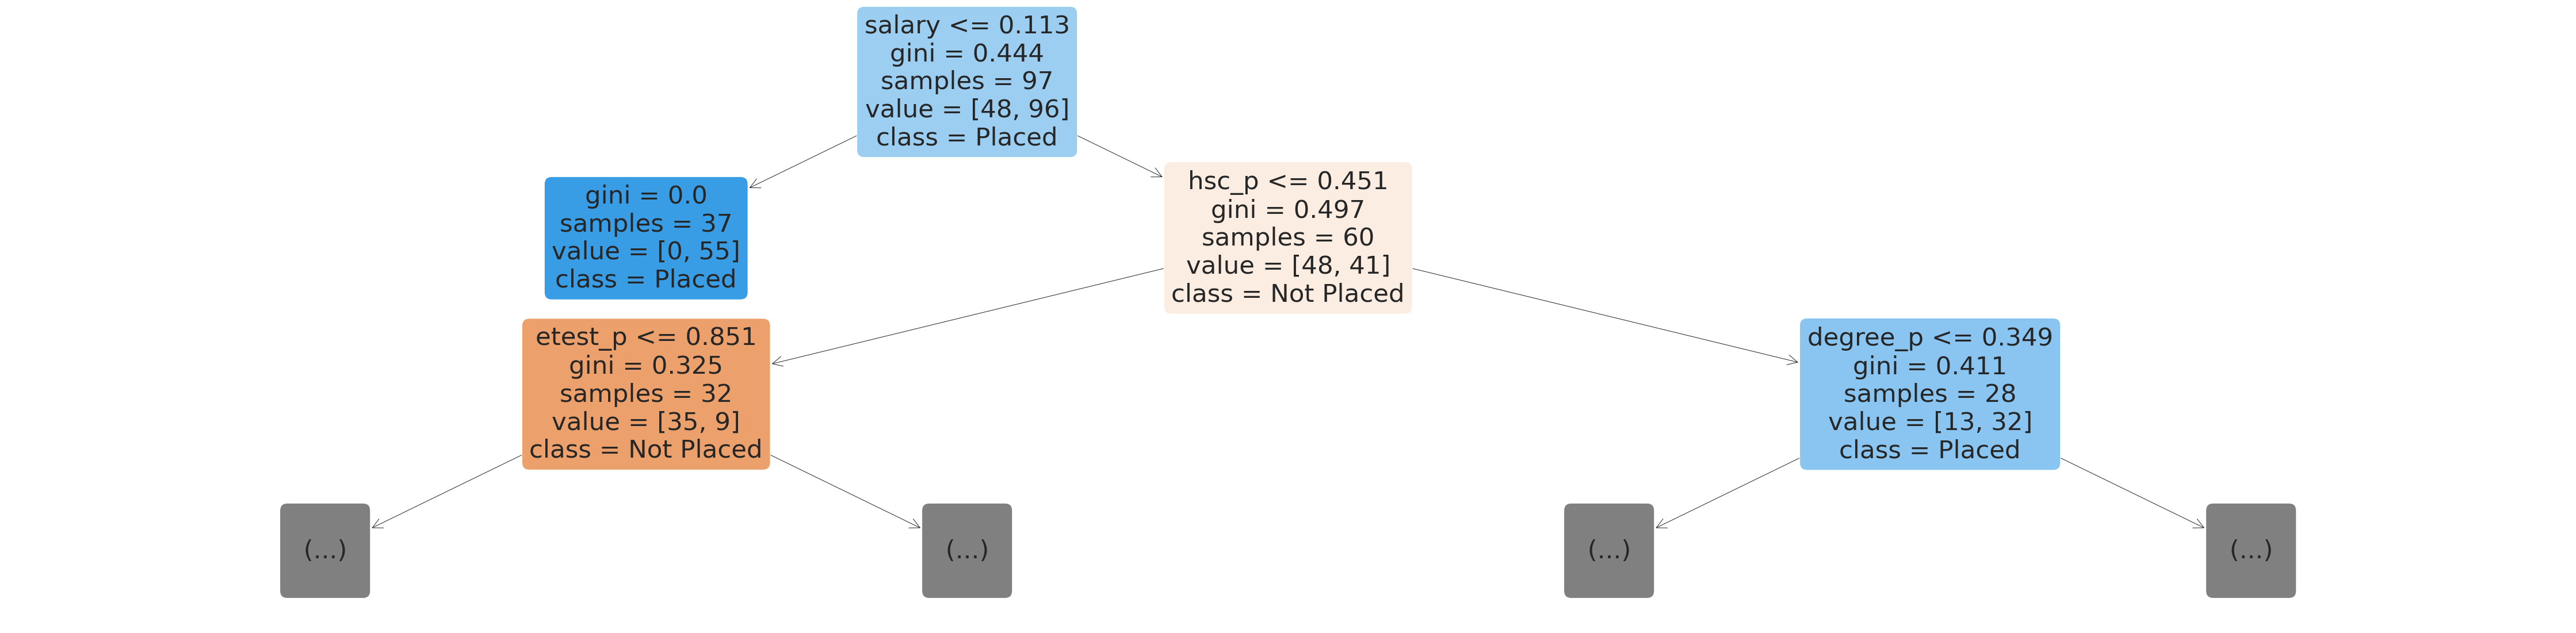

In [188]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

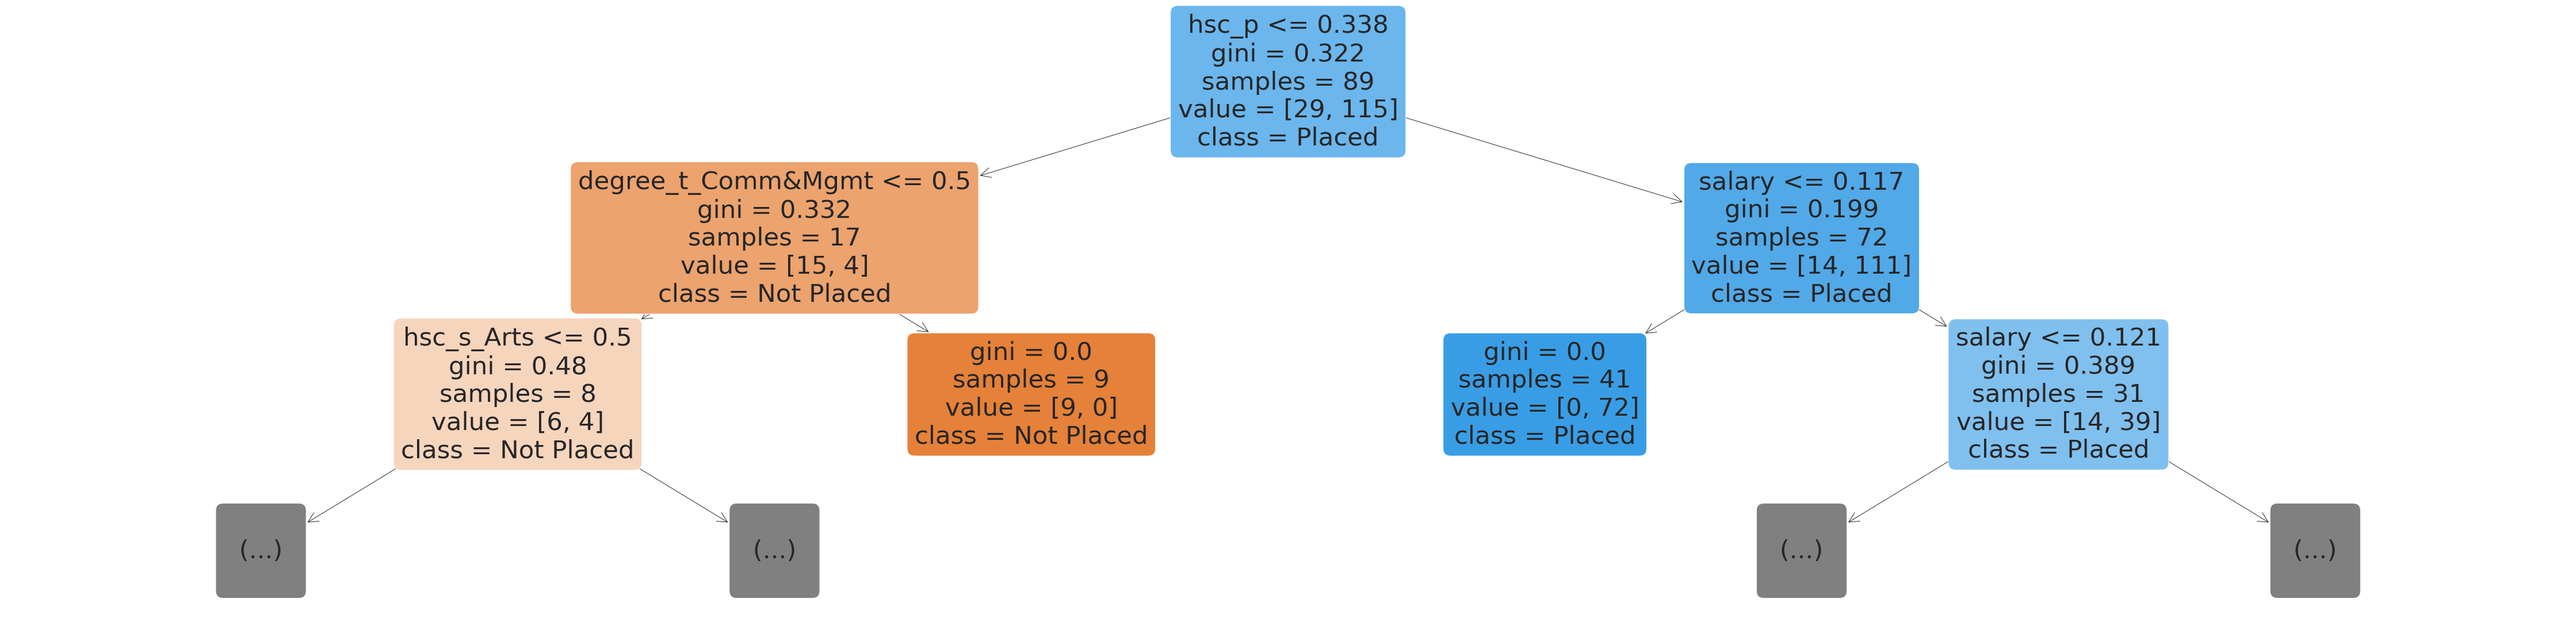

In [189]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [247]:
len(model.estimators_)

100

Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [248]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [249]:
importance_df.head(10)

,feature,importance
0,ssc_p,0.259382
5,salary,0.244809
1,hsc_p,0.138838
2,degree_p,0.088422
4,mba_p,0.060250
3,etest_p,0.053628
19,workex_Yes,0.020275
18,workex_No,0.016143
21,specialisation_Mkt&HR,0.013604
6,gender_F,0.013599


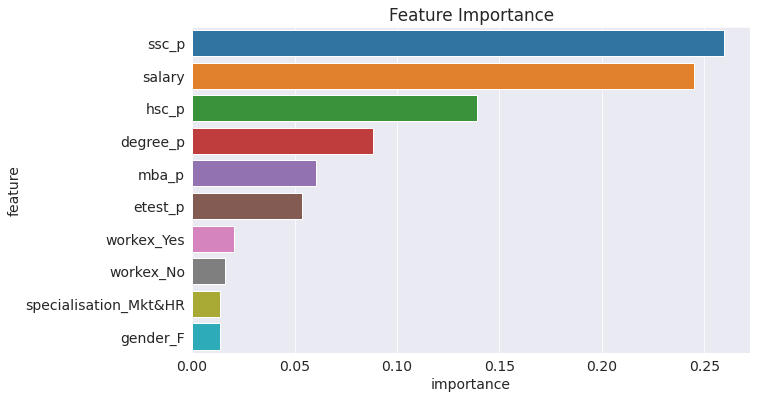

In [250]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Notice that the distribution is a lot less skewed than that for a single decision tree.

Let's save our work before continuing.

In [92]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aakashns/sklearn-decision-trees-random-forests


'https://jovian.ai/aakashns/sklearn-decision-trees-random-forests'

## Hyperparameter Tuning with Random Forests

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees. 

Let's study some the hyperparameters for random forests. You can learn more about them here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [93]:
?RandomForestClassifier

Let's create a base model with which we can compare models with tuned hyperparameters.

In [94]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [95]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [96]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999494888269285, 0.8566537055307295)

We can use this as a benchmark for hyperparmeter tuning.

### `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed. 


**10 estimators**

In [97]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [98]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [99]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.986958015112943, 0.8485868492832686)

In [100]:
base_accs

(0.9999494888269285, 0.8566537055307295)

**500 estimators**

In [101]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [102]:
model.score(X_train, train_targets)

0.9999797955307714

In [103]:
model.score(X_val, val_targets)

0.8577563693343393

In [104]:
base_accs

(0.9999494888269285, 0.8566537055307295)

> **EXERCISE**: Vary the value of `n_estimators` and plot the graph between training error and validation error. What is the optimal value of `n_estimators`?

### `max_depth` and `max_leaf_nodes`

These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a `max_depth` to reduce overfitting.

<img src="https://i.imgur.com/EJCrSZw.png" width="480">


Let's define a helper function `test_params` to make it easy to test hyperparameters.

In [105]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

Let's test a few values of `max_depth` and `max_leaf_nodes`.

In [106]:
test_params(max_depth=5)

(0.8197862367155615, 0.8240961058557251)

In [107]:
test_params(max_depth=26)

(0.9814826039519942, 0.8572340549010504)

In [108]:
test_params(max_leaf_nodes=2**5)

(0.8314341132258456, 0.833904010214149)

In [109]:
test_params(max_leaf_nodes=2**20)

(0.9999494888269285, 0.8556671116011839)

In [110]:
base_accs # no max depth or max leaf nodes

(0.9999494888269285, 0.8566537055307295)

The optimal values of `max_depth` and `max_leaf_nodes` lies somewhere between 0 and unbounded.

> **EXERCISE**: Vary the value of `max_depth` and plot the graph between training error and validation error. What is the optimal value of `max_depth`? Do the same for `max_leaf_nodes`.

### `max_features`

Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split.

<img src="https://i.imgur.com/FXGWMDY.png" width="720">

Notice that the default value `auto` causes only $\sqrt{n}$ out of total features ( $n$ ) to be chosen randomly at each split. This is the reason each decision tree in the forest is different. While it may seem counterintuitive, choosing all features for every split of every tree will lead to identical trees, so the random forest will not generalize well. 

In [111]:
test_params(max_features='log2')

(0.9999595910615429, 0.8558992513493123)

In [112]:
test_params(max_features=3)

(0.9999494888269285, 0.8543323080494458)

In [113]:
test_params(max_features=6)

(0.9999595910615429, 0.8558992513493123)

In [114]:
base_accs

(0.9999494888269285, 0.8566537055307295)

> **EXERCISE**: Find the optimal values of `max_features` for this dataset.

### `min_samples_split` and `min_samples_leaf`

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [115]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9625005051117307, 0.8565956705936975)

In [116]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8495676243585081, 0.8451047530613429)

In [117]:
base_accs

(0.9999494888269285, 0.8566537055307295)

> **EXERCISE**: Find the optimal values of `min_samples_split` and `min_samples_leaf`.

### `min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.



In [118]:
test_params(min_impurity_decrease=1e-7)

(0.9996060128500425, 0.8561313910974406)

In [119]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

In [120]:
base_accs

(0.9999494888269285, 0.8566537055307295)

> **EXERCISE**: Find the optimal values of `min_impurity_decrease` for this dataset.

### `bootstrap`, `max_samples` 

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.


<img src="https://i.imgur.com/W8UGaEA.png" width="640">

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [121]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

In [122]:
base_accs

(0.9999494888269285, 0.8566537055307295)

When bootstrapping is enabled, you can also control the number or fraction of rows to be considered for each bootstrap using `max_samples`. This can further generalize the model.

<img src="https://i.imgur.com/rsdrL1W.png" width="640">

In [123]:
test_params(max_samples=0.9)

(0.9997676486038711, 0.8565376356566653)

In [124]:
base_accs

(0.9999494888269285, 0.8566537055307295)

Learn more about bootstrapping here: https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710

### `class_weight`

In [125]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [126]:
test_params(class_weight='balanced')

(0.9999494888269285, 0.8543903429864779)

In [127]:
test_params(class_weight={'No': 1, 'Yes': 2})

(0.9999595910615429, 0.8558412164122802)

In [128]:
base_accs

(0.9999494888269285, 0.8566537055307295)

> **EXERCISE**: Find the optimal value of `class_weight` for this dataset.

### Putting it together

Let's train a random forest with customized hyperparameters based on our learnings. Of course, different hyperpraams

In [129]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=30, 
                               class_weight={'No': 1, 'Yes': 1.5})

In [130]:
model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={'No': 1, 'Yes': 1.5}, max_depth=30,
                       max_features=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [131]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9920192346547057, 0.8563054959085369)

In [132]:
base_accs

(0.9999494888269285, 0.8566537055307295)

We've increased the accuracy from 84.5% with a single decision tree to 85.7% with a well-tuned random forest. Depending on the dataset and the kind of problem, you may or may not a see a significant improvement with hyperparameter tuning. 

This could be due to any of the following reasons:

- We may not have found the right mix of hyperparameters to regularize (reduce overfitting) the model properly, and we should keep trying to improve the model.

- We may have reached the limits of the modeling technique we're currently using (Random Forests), and we should try another modeling technique e.g. gradient boosting.

- We may have reached the limits of what we can predict using the given amount of data, and we may need more data to improve the model.

- We may have reached the limits of how well we can predict whether it will rain tomorrow using the given weather measurements, and we may need more features (columns) to further improve the model. In many cases, we can also generate new features using existing features (this is called feature engineering).

- Whether it will rain tomorrow may be an inherently random or chaotic phenomenon which simply cannot be predicted beyond a certain accuracy any amount of data for any number of weather measurements with any modeling technique.  

Remember that ultimately all models are wrong, but some are useful. If you can rely on the model we've created today to make a travel decision for tomorrow, then the model is useful, even though it may sometimes be wrong.

In [133]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


> **EXERCISE**: Experiment with the hyperparameters of the random forest classifier, and try to maximize the validation accuracy.

Finally, let's also compute the accuracy of our model on the test set.

In [134]:
model.score(X_test, test_targets)

0.8451913451913452

Notice that the test accuracy is lower

Let's save our work before continuing.

In [135]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aakashns/sklearn-decision-trees-random-forests


'https://jovian.ai/aakashns/sklearn-decision-trees-random-forests'

K-Nearest Neighbors (KNN)
---------------------------------------

The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. 

> It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. 

KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

Theory
----------
The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

Let's see this algorithm in action with the help of a simple example. Suppose you have a dataset with two variables, which when plotted, looks like the one in the following figure.

> Manhattan distance between 2 points is the distance along the axis, like you measure the distance in a right angled way. Usually used in circuits to measure the distance wires take; as the wires cannot run in between the circuit-boards.

![sample_data_points_for_KNN](https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/05_overfitting.png)

Your task is to classify a new data point with 'X' into "Blue" class or "Red" class. The coordinate values of the data point are x=45 and y=50. Suppose the value of K is 3. The KNN algorithm starts by calculating the distance of point X from all the points. It then finds the 3 nearest points with least distance to point X. This is shown in the figure below. The three nearest points have been encircled.

![sample_data_points_for_KNN](https://miro.medium.com/max/650/1*OyYyr9qY-w8RkaRh2TKo0w.png)

The final step of the KNN algorithm is to assign new point to the class to which majority of the three nearest points belong. From the figure above we can see that the two of the three nearest points belong to the class "Red" while one belongs to the class "Blue". Therefore the new data point will be classified as "Red".

## Training

In [288]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(X_train, train_targets)
# y_pred = classifier.predict(X_test)

KNeighborsClassifier(n_neighbors=7)

## Evaluation

In [289]:
def predict_and_plot(inputs, targets, name=''):
    preds = classifier.predict(inputs)
    
    print(classification_report(targets, preds)) 
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

              precision    recall  f1-score   support

  Not Placed       0.73      0.38      0.50        21
      Placed       0.78      0.94      0.85        50

    accuracy                           0.77        71
   macro avg       0.76      0.66      0.68        71
weighted avg       0.77      0.77      0.75        71

Accuracy: 77.46%


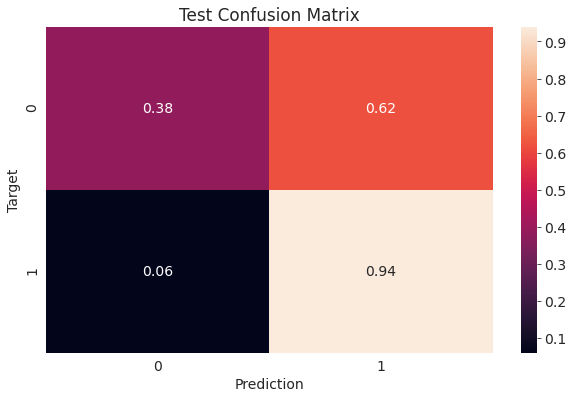

In [290]:
predict_and_plot(X_test, test_targets, 'Test')

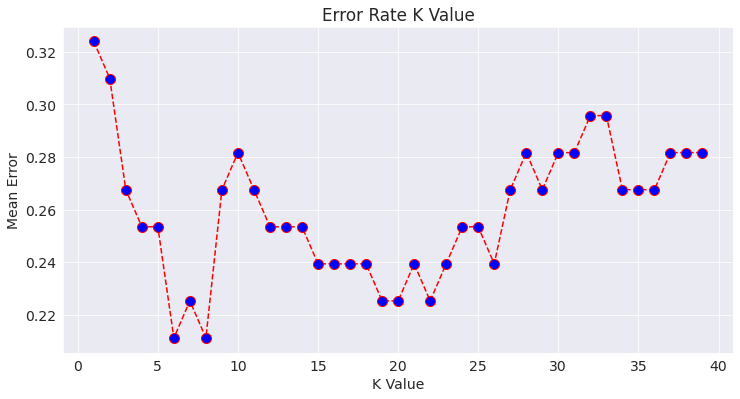

In [291]:
error = []

for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, train_targets)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != test_targets))
    
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')     
plt.show()

# Support Vector Machine (SVM)

SVM is basically used to linearly separate the classes of the output variable by drawing a Classifier/hyperplane — for a 2D space, the hyperplane is a Line; for a 3D space, a hyperplane is a Plane.

> Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

![](https://miro.medium.com/max/976/0*1YBAq0iBDuSA4GB1.png)

In the above fig, the hyperplane H3 is the best or optimal classifier as it has maximum distance(called as margin) from the support vectors(the closest data points).

![](https://miro.medium.com/max/875/0*wslDQntNg7Ro8VAg.png)

A kernel is nothing but a transformation that we apply to the existing features so that we can draw a classifier easily for non-linearly separable datapoints.

In [292]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,train_targets)

SVC()

In [293]:
def predict_and_plot(inputs, targets, name=''):
    preds = svc_model.predict(inputs)
    
    print(classification_report(targets, preds)) 
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

              precision    recall  f1-score   support

  Not Placed       0.78      0.33      0.47        21
      Placed       0.77      0.96      0.86        50

    accuracy                           0.77        71
   macro avg       0.78      0.65      0.66        71
weighted avg       0.78      0.77      0.74        71

Accuracy: 77.46%


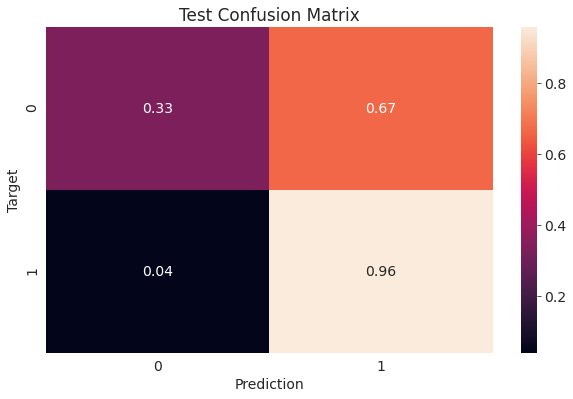

In [294]:
predict_and_plot(X_test, test_targets, 'Test')

## Making Predictions on New Inputs

Let's define a helper function to make predictions on new inputs.

In [146]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [147]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [148]:
predict_input(model, new_input)

('Yes', 0.7608595348304203)

> **EXERCISE**: Try changing the values in `new_input` and observe how the predictions and probabilities change. Try different values of location, temperature, humidity, pressure etc. Try to get an _intuitive feel_ of which columns have the greatest effect on the result of the model.

In [149]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

## Saving and Loading Trained Models

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk. 

In [150]:
import joblib

In [151]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [152]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

The object can be loaded back using `joblib.load`

In [153]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [ ]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

Let's save our work before continuing.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Summary and References

The following topics were covered in this tutorial:

- Downloading a real-world dataset
- Preparing a dataset for training
- Training and interpreting decision trees
- Training and interpreting random forests
- Overfitting, hyperparameter tuning & regularization
- Making predictions on single inputs



We also introduced the following terms:

* Logistic Regression
* Decision tree
* Random Forest
* KNN(K-Nearest Neighbour)
* SVM(Support Vector Machine)
* Overfitting
* Hyperparameter
* Hyperparameter tuning
* Regularization
* Ensembling
* Generalization
* Bootstrapping


Check out the following resources to learn more: 

- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/
- https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
- https://www.kaggle.com/willkoehrsen/introduction-to-manual-feature-engineering
- https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search
- https://www.kaggle.com/c/home-credit-default-risk/discussion/64821
